In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [56]:
df=pd.read_csv('dataset_chronic_kidney_disease.csv')

In [57]:
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


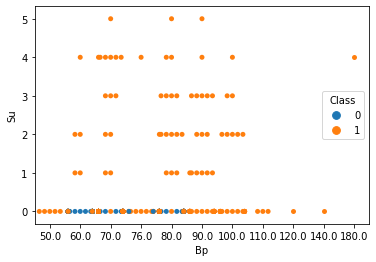

In [58]:
sns.swarmplot(x='Bp',y='Su',data=df,hue='Class')

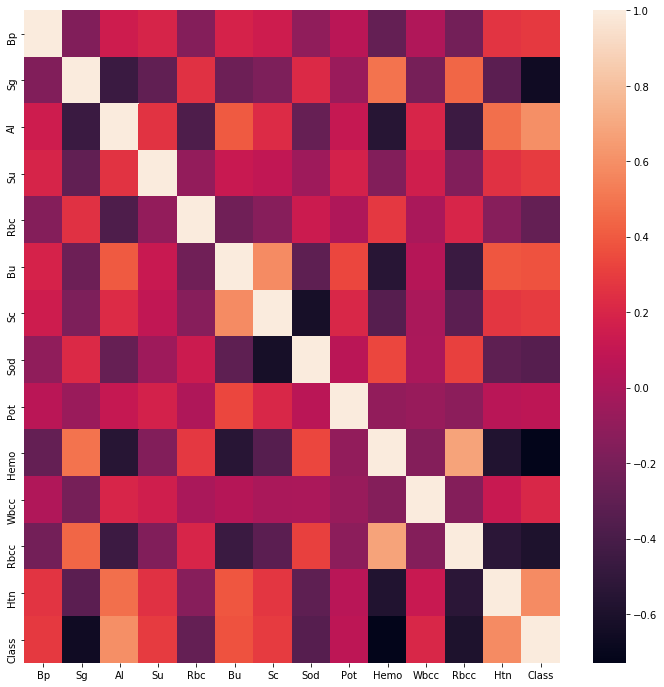

In [59]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr())

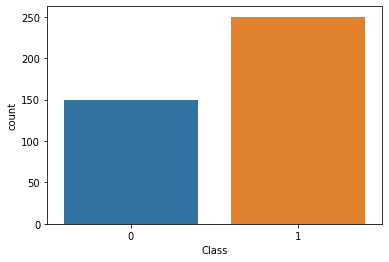

In [60]:
sns.countplot(x='Class',data=df)

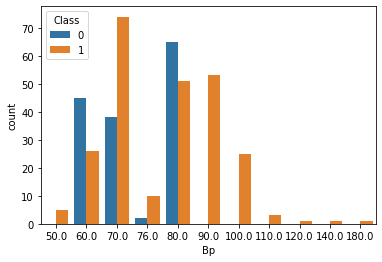

In [61]:
sns.countplot(x='Bp',hue='Class',data=df)

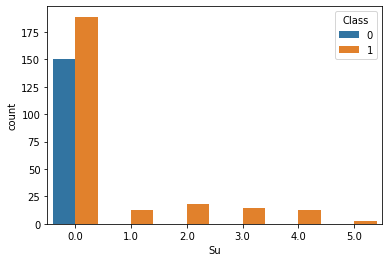

In [62]:
sns.countplot(x='Su',hue='Class',data=df)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X=df.drop(columns={'Class'})
y=df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [65]:
X_train.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
258,80.0,1.020,0.0,0.0,1.0,20.0,0.5,140.00,3.50,13.90,8400.0,5.50,0.0
177,80.0,1.015,2.0,1.0,1.0,133.0,2.5,137.53,4.63,13.20,8406.0,4.71,0.0
119,70.0,1.010,0.0,0.0,1.0,27.0,1.2,137.53,4.63,12.53,8406.0,4.71,0.0
194,70.0,1.010,2.0,0.0,1.0,49.0,1.2,137.53,4.63,12.53,8406.0,4.71,1.0
229,50.0,1.010,3.0,0.0,1.0,191.0,12.0,114.00,2.90,9.60,15700.0,3.80,0.0


In [66]:
y_train.head()

258    0
177    1
119    1
194    1
229    1
Name: Class, dtype: int64

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
pred=rfc.predict(X_test)

In [70]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [71]:
print("The accuracy is {}%".format(accuracy_score(y_test,pred)*100))

The accuracy is 100.0%


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        84

    accuracy                           1.00       132
   macro avg       1.00      1.00      1.00       132
weighted avg       1.00      1.00      1.00       132



In [73]:
print(confusion_matrix(y_test,pred))

[[48  0]
 [ 0 84]]


In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lrModel=LogisticRegression()

In [76]:
lrModel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
lrPred=lrModel.predict(X_test)

In [78]:
print("The accuracy is {}%".format(accuracy_score(y_test,lrPred)*100))

The accuracy is 95.45454545454545%


In [79]:
print(classification_report(y_test,lrPred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.99      0.94      0.96        84

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



In [80]:
print(confusion_matrix(y_test,lrPred))

[[47  1]
 [ 5 79]]


In [81]:
from sklearn.cluster import KMeans

In [95]:
kMeansModel=KMeans(n_clusters=2)

In [96]:
kMeansModel.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [97]:
kMeansPred=kMeansModel.predict(X_test)

In [98]:
print("The accuracy is {}%".format(accuracy_score(y_test,kMeansPred)*100))

The accuracy is 45.45454545454545%


In [99]:
print(classification_report(y_test,kMeansPred))

              precision    recall  f1-score   support

           0       0.39      0.88      0.54        48
           1       0.75      0.21      0.33        84

    accuracy                           0.45       132
   macro avg       0.57      0.54      0.44       132
weighted avg       0.62      0.45      0.41       132



In [100]:
print(confusion_matrix(y_test,kMeansPred))

[[42  6]
 [66 18]]
